# Защита персональных данных клиентов

#### Тема проекта:
- Исследование метода защиты персональных данных клиентов

#### Цель:
- Исследовать и использовать на практике метод шифрования данных

#### Поставленные задачи:
- Изучить предоставленные данные;
- Для шифрования данных использовать метод умножения на обратимую матрицу;
- Исследовать связь параметров линейной регрессии;
- Проверить, изменятся ли предсказания модели и значение метрики R-квадрат.

#### Краткий план работы:
- [Шаг 1. Загрузка и изучение данных](#Шаг-1.-Загрузка-и-изучение-данных)
- [Шаг 2. Проверка метода умножения на матрицу](#Шаг-2.-Проверка-метода-умножения-на-матрицу)
  - [2.1. Обучение на исходных данных](#2.1.-Обучение-на-исходных-данных)
  - [2.2. Умножение на обратимую матрицу](#2.2.-Умножение-на-обратимую-матрицу)
  - [2.3. Связь параметров линейной регрессии](#2.3.-Связь-параметров-линейной-регрессии)
- [Шаг 3. Алгоритм преобразования](#Шаг-3.-Алгоритм-преобразования)
- [Шаг 4. Проверка алгоритма](#Шаг-4.-Проверка-алгоритма)

#### Вывод:
- Изучены предоставленные данные;
- Для шифрования данных использован метод умножения на обратимую матрицу;
- Использованный метод шифрования не повлиял на значение предсказаний и на метрику R-квадрат.

**Статус проекта**: проект завершён.  

**Используемые библиотеки**: *numpy*, *pandas*, *matplotlib*, *sklearn*  

**Источник данных**: [курс Data Science от Яндекс.Практикум](https://praktikum.yandex.ru/profile/data-scientist/)

In [1]:
# отключение предупреждений
import warnings
warnings.filterwarnings('ignore') 

# импорт библиотек и функция для дальнейшей работы
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

## Шаг 1. Загрузка и изучение данных

Загрузим файл, выведем несколько строк и посмотрим общую информацию:

In [2]:
# выгрузка нескольких строк
insurance = pd.read_csv('datasets/insurance.csv')
print(insurance.info())
insurance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


- Файл содержит **5000 строк** и **5 колонок**.
- На первый взгляд явных **пропусков нет**.
- **Тип данных** для каждой колонки указан корректно.

Проверим, чтобы в колонках не было **аномальных значений** (например, неправдоподобно большой или маленький возраст, пол кроме 0 и 1 и др.).

In [3]:
# выведем для каждой колонки уникальные значения
for name in ['Пол', 'Возраст', 'Члены семьи', 'Страховые выплаты']:
    print(name)
    print(sorted(insurance[name].unique()))
    print()

Пол
[0, 1]

Возраст
[18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 65.0]

Члены семьи
[0, 1, 2, 3, 4, 5, 6]

Страховые выплаты
[0, 1, 2, 3, 4, 5]



Явно аномальных и подозрительных значений не обнаружено.

Дополнительно проверим датасет на наличие **дубликатов**:

In [4]:
# проверка на наличие дубликатов
print('Количество дубликатов:', insurance.duplicated().sum())
insurance[insurance.duplicated()].head()

Количество дубликатов: 153


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0


В датасете обнаружено **153 дубликата**. Причины появления дубликатов: записи **действительно задублированы** (в определении задублированных записей могли бы помочь id) либо это люди, которые имеют **похожие социально-экономические** характеристики.

В реальной жизни стоило бы задать вопрос коллегам, ответственным за выгрузку. В данном случае, мы оставим данные без изменений и продолжим **работать с 500 строками**.

Дополнительно рассмотрим **распределение данных** по переменным с типом *float* - **возрасту** и **зарплате**:

In [5]:
def describe_hist(df_name, col_name, title, col_label, bins=50, xticks=None):
    """Функция выводит сводную статистику, боксплот и гистограмму:
    - df_name - название датафрейма;
    - col_name - название колонки;
    - title - значение title;
    - col_label - подпись для оси со значениями колонки;
    - bins (по умолчанию 50) - значение bins;
    - xticks - значение xticks."""
    
    # вывод сводной статистики
    print(df_name[col_name].describe())
    
    # построение боксплот
    insurance.boxplot(col_name, by='Страховые выплаты', figsize=(9, 5))
    plt.title(f'{title} (по группам страховых выплат)')
    plt.xlabel('Количество страховых выплат')
    plt.ylabel(col_label)
    plt.show()
     
    # построение гистограммы
    plt.figure(figsize=(10,5))
    df_name[col_name].hist(bins=bins)
    plt.title(title)
    plt.xlabel(col_label)
    plt.xticks(xticks, rotation=45)
    plt.show()

In [6]:
# количество клиентов для разного количества выплат
print('Количество клиентов для разного количества выплат:')
print(insurance['Страховые выплаты'].value_counts())

Количество клиентов для разного количества выплат:
0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64


count    5000.000000
mean       30.952800
std         8.440807
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: Возраст, dtype: float64


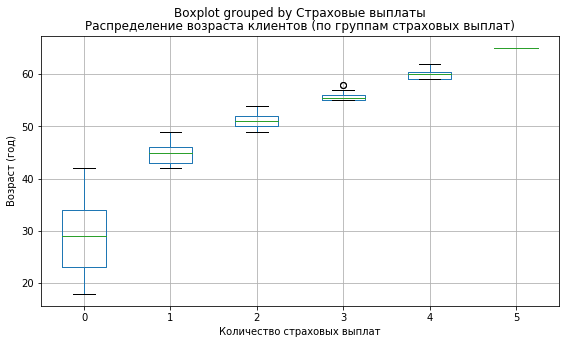

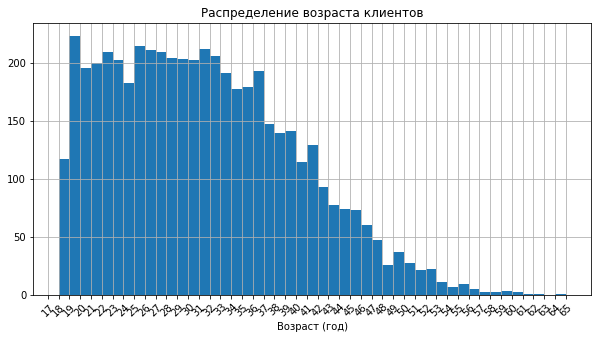

In [7]:
# распределение для возраста
describe_hist(insurance, 'Возраст', 'Распределение возраста клиентов', 'Возраст (год)',
              bins=insurance['Возраст'].nunique()+1, xticks=np.arange(17, 66))

- Среднему клиенту страховой компании **30 лет**.
- Данные распределены не нормально: среди клиентов страховой компании больше всего **молодых людей** до 40 лет.
- В выборке чем **старше** становится человек, тем **бо́льшее суммарное количество страховых выплат** он получает.  
На первый взгляд выглядит логично - если человек долго являлся клиентом банка, возможно, он успел получить уже несколько выплат. Однако, в задании сказано, что страховые выплаты указаны **за 5 лет**. Поэтому, возможно, причина таких закономерностей может быть в чём-то другом.
- Важно учесть, что для 3, 4, 5 выплат количество клиентов в каждой группе **менее 19 человек** - это довольно маленькое количество, чтобы сделать вывод.

count     5000.000000
mean     39916.360000
std       9900.083569
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: Зарплата, dtype: float64


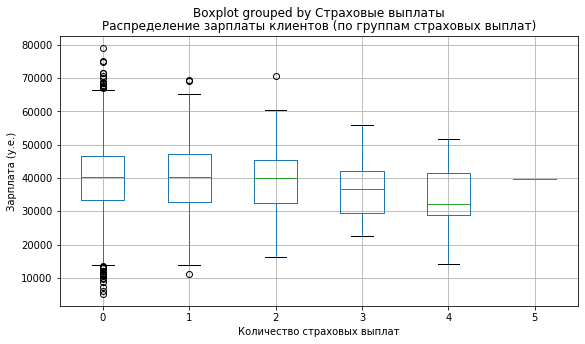

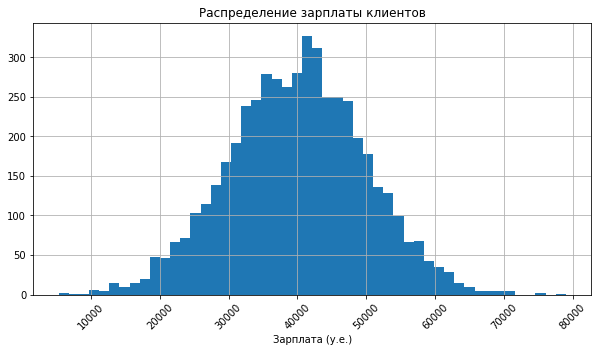

In [8]:
# распределение для зарплаты
describe_hist(insurance, 'Зарплата', 'Распределение зарплаты клиентов', 'Зарплата (у.е.)')

- В среднем клиент страховой получает около **40 000 у.е.** (валюта неизвестна, поэтому будем называть её условной единицей - у. е.).
- Зарплата клиентов имеет **нормальное распределение**.
- Для выплат с количеством 0, 1 и 2 средние выборочные значения **похожи**. Для групп 3, 4, 5 значения отличаются, однако в каждой из этих групп менее 19 человек.

## Шаг 1. Вывод

- Файл содержит **5000 строк** и **5 колонок**.
- В датасете **отсутствуют** явные **пропуски**.
- **Тип данных** для каждой колонки указан корректно.
- **Аномальных значений** (например, неправдоподобно большой или маленький возраст, пол кроме 0 и 1 и др.) **не обнаружено**.
- Присутствует **153 дубликата**.
- Изучено распределение **возраста** и **зарплаты**:
  - **Средний** возраст клиента банка **30 лет**. При этом возраст распределен **не нормально**.
  - В среднем клиента банка получает **около 40 тыс. у. е.**. Зарплата клиентов распределена **нормально**.
- Из интересных закономерностей обнаружено, что у **более взрослых** клиентов **бо́льшее** число **страховы выплат**. Однако стоит учесть, что для 3, 4, 5 выплат количество клиентов в каждой группе **менее 19 человек** - это довольно маленькое количество, чтобы сделать вывод.

## Шаг 2. Проверка метода умножения на матрицу

Одним из возможных методов шифрования данных является **умножение на обратимую матрицу**.  
Рассмотрим данный метод для **линейной регрессии** и посмотрим, изменится ли значение метрики **R-квадрат**.

Данный шаг разобьём на несколько этапов:
- [2.1. Обучение на исходных данных](#2.1.-Обучение-на-исходных-данных)
- [2.2. Умножение на обратимую матрицу](#2.2.-Умножение-на-обратимую-матрицу)
- [2.3. Связь параметров линейной регрессии](#2.3.-Связь-параметров-линейной-регрессии)

### 2.1. Обучение на исходных данных

Выделим **признаки** и **целевой признак** для дальнейшего обучения модели:
- **Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.
- **Целевой признак**: количество страховых выплат клиенту за последние 5 лет.

Для тестирования модели разделим выборку на **обучающую** и **тестовую** (доля тестовой выборки 25%).

In [9]:
SEED = 54321

# выделение признаков
features = insurance.drop('Страховые выплаты', axis=1)
# выделение целевого признака
target = insurance['Страховые выплаты']

# разделение выборок
features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=0.25, random_state=SEED)

print('Количество элементов в обучающей выборке:', len(features_train))
print('Количество элементов в тестовой выборке:', len(features_test))
print()

# обучение модели
model = LinearRegression()
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print('Значение R-квадрат:', r2_score(target_test, predictions_test))
print('Предсказанные значения:', predictions_test[:6])

Количество элементов в обучающей выборке: 3750
Количество элементов в тестовой выборке: 1250

Значение R-квадрат: 0.4128950049384499
Предсказанные значения: [ 0.78004231 -0.30575652  0.69274494 -0.19920586  0.20359419  0.47501608]


Мы получили значение интересующей нас метрики **R-квадрат**, а также вывели несколько значений.  
Бросается в глаза то, что модель предсказывает **нецелочисленные** и **отрицательные** значения целевой переменной.  
Однако сосредоточимся на целевом вопросе - как повлияет на результат **умножение** признаков на **обратимую матрицу**.

### 2.2. Умножение на обратимую матрицу

Посмотрим, какие получатся результаты при умножении признаков на **обратимую матрицу**:  
1. Создадим **случайную матрицу**, проверим, чтобы она была **обратима**.
2. Умножим на эту матрицу признаки **обучающей** и **тестовой** выборки.
3. Повторно обучим модель и посмотрим на результат.

Создадим случайную матрицу размером **4х4** и проверим, чтобы она была **обратима**: посчитаем **обратную матрицу**.  
Если матрица необратима, будет ошибка.

In [10]:
np.random.seed(SEED) # зафиксируем матрицу
random_matrix = np.random.random((4, 4))
print('Случайная матрица:')
print(random_matrix)
print()

print('Обратная матрица:')
print(np.linalg.inv(random_matrix))

Случайная матрица:
[[0.91164078 0.62382484 0.79180384 0.4297848 ]
 [0.54301296 0.41345828 0.08564072 0.77761304]
 [0.48894968 0.05053068 0.53842679 0.04146943]
 [0.80809445 0.99525363 0.63870977 0.94585959]]

Обратная матрица:
[[ 4.7617145   1.96783951 -2.98500126 -3.65058821]
 [ 3.21317607 -1.17947405 -4.17301187 -0.30738957]
 [-4.27427426 -1.73252498  4.66775746  3.16186767]
 [-4.56285431  0.7297661   3.78917329  2.36444704]]


Всё в порядке, ошибки нет. Значит, матрица **обратима** - мы можем использовать её для следующего шага.  
**Умножим** признаки обучающей и тестовой выборки на созданную матрицу:

In [11]:
# умножение для обучающей выборки
features_train_encode = np.dot(features_train, random_matrix)
features_train_encode = pd.DataFrame(features_train_encode, columns=features_train.columns)
print('Проверка значений (обучающая выборка):')
print(features_train_encode.head())
print()

# умножение для тестовой выборки
features_test_encode = np.dot(features_test, random_matrix)
features_test_encode = pd.DataFrame(features_test_encode, columns=features_test.columns)
print('Проверка значений (тестовая выборка):')
print(features_test_encode.head())

Проверка значений (обучающая выборка):
            Пол      Возраст      Зарплата  Члены семьи
0   9109.125456   951.034043  10017.050647   792.327036
1  25001.619196  2594.521555  27516.178336  2142.416502
2  14061.079729  1472.480512  15458.322770  1230.167532
3   8335.216239   876.968622   9157.405458   737.808383
4  24757.383736  2571.338274  27249.559004  2120.967791

Проверка значений (тестовая выборка):
            Пол      Возраст      Зарплата  Члены семьи
0  13814.445686  1444.811206  15187.746313  1206.763483
1  17318.593016  1796.228361  19061.850000  1482.015021
2  18605.874649  1940.180218  20464.796311  1612.554576
3  23872.147808  2474.579864  26277.025946  2040.038285
4  27839.525025  2889.050247  30640.016820  2384.924233


Теперь заново обучим модель по уже **зашифрованным признакам** и для сравнения выведем результаты для исходных и закодированных значений:

In [12]:
# обучение закодированных данных
model = LinearRegression()
model.fit(features_train_encode, target_train)
predictions_test_encode = model.predict(features_test_encode)

print('Исходные значения:')
print('Значение R-квадрат:', r2_score(target_test, predictions_test))
print('Предсказанные значения:', predictions_test[:6])
print()

print('Закодированные значения:')
print('Значение R-квадрат:', r2_score(target_test, predictions_test_encode))
print('Предсказанные значения:', predictions_test_encode[:6])
print()

print('Разница между метриками R-квадрат:',
      r2_score(target_test, predictions_test) - r2_score(target_test, predictions_test_encode))

Исходные значения:
Значение R-квадрат: 0.4128950049384499
Предсказанные значения: [ 0.78004231 -0.30575652  0.69274494 -0.19920586  0.20359419  0.47501608]

Закодированные значения:
Значение R-квадрат: 0.41289500493817555
Предсказанные значения: [ 0.78004231 -0.30575652  0.69274494 -0.19920586  0.20359419  0.47501608]

Разница между метриками R-квадрат: 2.743361093848762e-13


Значения **практически одинаковые**. Посмотрим какое **значение ошибки** при сравнении предсказаний по исходным и зашифрованным данным. Выберем для оценки метрику MAE:

In [13]:
print('Значение MAE (сравнение исходных и закодированных значений):', 
      mean_absolute_error(predictions_test, predictions_test_encode))

Значение MAE (сравнение исходных и закодированных значений): 8.30762685311015e-12


Значение ошибки очень **маленькое**. Значит, предсказанные значения **очень похожи**, а различие происходят в силу округлений.  
Таким образом, **предсказанные значения** и **значение R-квадрат** остались практически прежними, т. е. умножение **не повлияло на качество** линейной регрессии.

### 2.3. Связь параметров линейной регрессии

Рассмотрим, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.  
Поэтапно изучим алгоритм работы линейной регрессии: создадим **класс линейной регрессии** и на каждом этапе будем смотреть, как ведут себя переменные.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)
- $y$ — вектор целевого признака
- $P$ — матрица, на которую умножаются признаки
- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Формулы:
- Предсказания: $a = Xw$
- Задача обучения: $w = \arg\min_w MSE(Xw, y)$
- Формула обучения: $w = (X^T X)^{-1} X^T y$

1. Обучение модели
 - Переменная `X` - соединение столбца с **единицами** и обучающими **признаками**. 
 - Переменная `y` - **целевой признак** обучающей выборки.
 - Переменная `w_all` - применение формулы для расчёта ветора $w$ (содержит $w$ и $w_0$): $w = (X^T X)^{-1} X^T y$
 - Из `w_all` выделяется отдельно `w` (все значения, кроме 1-го) и `w0` (первое значение).


2. Предсказание модели
 - Для предсказания необходимо умножить обучающие признаки на параметр `w` и прибавить параметр `w0`: $a = Xw + w_{0}$

In [14]:
# создание класса
class LinearRegression_Manual:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target.values
        w_all = np.linalg.inv(X.T.dot(X)) @ X.T @ y
        self.w = w_all[1:]
        self.w0 = w_all[0]

    def predict(self, test_features):
        test_predictions = test_features.dot(self.w) + self.w0
        return test_predictions.values

Сначала проверим, чтобы результаты созданной нами линейной регрессии совпадали с результатами линейной регрессии из `sklearn.linear_model`.

In [15]:
# модель из библиотеки
model = LinearRegression()
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
r2_value = r2_score(target_test, predictions_test)

print('Модель из библиотеки')
print('Значение R-квадрат:', r2_value)
print('Предсказанные значения:', predictions_test[:6])
print()


# созданная модель
model_manual = LinearRegression_Manual()
model_manual.fit(features_train, target_train)
predictions_test_manual = model_manual.predict(features_test)
r2_value_manual = r2_score(target_test, predictions_test_manual)

print('Созданная модель')
print('Значение R-квадрат:', r2_value_manual)
print('Предсказанные значения:', predictions_test_manual[:6])
print()


# сравнение моделей
print('Разница между метриками R2:', r2_value - r2_value_manual)
print('Значение MAE:', 
      mean_absolute_error(predictions_test, predictions_test_manual))

Модель из библиотеки
Значение R-квадрат: 0.4128950049384499
Предсказанные значения: [ 0.78004231 -0.30575652  0.69274494 -0.19920586  0.20359419  0.47501608]

Созданная модель
Значение R-квадрат: 0.41289500493845055
Предсказанные значения: [ 0.78004231 -0.30575652  0.69274494 -0.19920586  0.20359419  0.47501608]

Разница между метриками R2: -6.661338147750939e-16
Значение MAE: 7.143192704006652e-14


Всё работает, результаты **практически совпали**. В этом случае также наблюдаются **незначительные различия** между результатами работы, по сути, одной и той же модели на одних и тех же данных. Скорее всего, данная разница возникает в результате округлений вычислений.

Теперь посмотрим, что происходит с переменными во время работы модели.

1. **Переменная X**. Соединяем колонку с единицами и признаки. Переменные X для исходных и зашифрованных данных будут **различаться**, т. к. обучающие признаки различны, а на этом шаге всего лишь добавляется столбец с единицей.

In [16]:
# исходные данные
X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
print('Исходные данные:')
print(X[:3])
print()

# закодированные данные
X_encode = np.concatenate((np.ones((features_train_encode.shape[0], 1)), features_train_encode), axis=1)
print('Закодированные данные:')
print(X_encode[:3])

Исходные данные:
[[1.00e+00 0.00e+00 2.70e+01 1.86e+04 0.00e+00]
 [1.00e+00 0.00e+00 3.00e+01 5.11e+04 0.00e+00]
 [1.00e+00 0.00e+00 4.90e+01 2.87e+04 2.00e+00]]

Закодированные данные:
[[1.00000000e+00 9.10912546e+03 9.51034043e+02 1.00170506e+04
  7.92327036e+02]
 [1.00000000e+00 2.50016192e+04 2.59452155e+03 2.75161783e+04
  2.14241650e+03]
 [1.00000000e+00 1.40610797e+04 1.47248051e+03 1.54583228e+04
  1.23016753e+03]]


2. В обоих случаях значение **целевого признака** остаётся **без изменений**:

In [17]:
# значение целевого признака
y = target_train.values
# пример нескольких значений
print(y[:10])

[0 0 1 0 0 0 0 1 0 0]


3. Получив значения X и y, мы подставляем их в **формулу обучения**: $w = (X^T X)^{-1} X^T y$

In [18]:
# исходные данные
w_all = np.linalg.inv(X.T.dot(X)) @ X.T @ y
w = w_all[1:]
w0 = w_all[0]
print('Исходные данные:')
print('Значение w:', w)
print('Значение w0:', w0)

print()

# закодированные данные
w_all_encode = np.linalg.inv(X_encode.T.dot(X_encode)) @ X_encode.T @ y
w_encode = w_all_encode[1:]
w0_encode = w_all_encode[0]
print('Закодированные данные:')
print('Значение w:', w_encode)
print('Значение w0:', w0_encode)

Исходные данные:
Значение w: [ 6.21727512e-03  3.61588036e-02 -1.43712287e-07 -1.35713800e-02]
Значение w0: -0.9515275746306244

Закодированные данные:
Значение w: [ 0.15030241 -0.01849957 -0.13213092 -0.03406934]
Значение w0: -0.9515295765096994


Мы получили очень **похожие** значения параметра `w0`. Этот параметр является интерсептом, который поднимает или опускает прямую регрессионной модели. В обеих случаях в матрицах под этот параметр был оставлен столбец с **единицами**. Поэтому после преобразования вместо единиц получился одинаковый параметр.

Значения `w` и `w_encode` различны, поскольку различались и исходные `X` и `X_encode`. Однако соотношение ${w}$ и ${(X^T X)^{-1} X^T}$ для обоих случаев равно **одному и тому же** значению $y$:
$$
y = \frac{w}{(X^T X)^{-1} X^T}
$$

4. Подставим значения в формулу для получения предсказаний. Предсказания получаются из **произведения** признаков и параметра $w$. После этого, к произведению прибавляется $w_{0}$, который, как мы рассмотрели выше, практически **одинаковый** для исходных и закодированные данных. 

$$
a = Xw + w_{0}
$$


In [19]:
# исходные данные
predictions_test = features_test.dot(w) + w0
r2_value = r2_score(target_test, predictions_test)
print('Исходные данные:')
print('Значение R-квадрат:', r2_value)
print(predictions_test.values)
print()

# закодированные данные
predictions_test_encode = features_test_encode.dot(w_encode) + w0_encode
r2_value_encode = r2_score(target_test.values, predictions_test_encode.values)
print('Закодированные данные:')
print('Значение R-квадрат:', r2_value_encode)
print(predictions_test_encode.values)
print()

# сравнение моделей
print('Разница между метриками R2:', r2_value - r2_value_encode)
print('Значение MAE:', 
      mean_absolute_error(predictions_test, predictions_test_encode))

Исходные данные:
Значение R-квадрат: 0.41289500493845055
[ 0.78004231 -0.30575652  0.69274494 ...  0.37153539  0.02274268
 -0.17058799]

Закодированные данные:
Значение R-квадрат: 0.4128950626741775
[ 0.7800405  -0.30575828  0.69274323 ...  0.37153356  0.02274086
 -0.17058982]

Разница между метриками R2: -5.773572697709284e-08
Значение MAE: 1.7931283425667742e-06


В данном случае значения **R-квадрат** также получились практически **одинаковыми**.

Итак, оптимальные значения **параметров** `w`, `w0` зависят от значений `X` (единицы и признаки) и `y` (целевой признак). В случае кодирования, `y` остаётся прежним, а `X` изменяется. В результате кодирования изменяются сами значения, но соотношения между признаками остаются прежнимими.

## Шаг 2. Вывод

- При **умножении** на обратимую матрицу, результат **качества** линейной регрессии и сами **предсказания** останутся **таким же**.
- Для исходных и преобразованных данных значение $w_{0}$ останется **одинаковым**.
- Параметры **$w$ различаются**. Однако соотношение ${w}$ и ${(X^T X)^{-1} X^T}$ равно одному и тому же значению $y$.

## Шаг 3. Алгоритм преобразования

#### Алгоритм
В качестве алгоритма преобразования данных можно предложить **умножение** исходных данных на **обратимую матрицу**.  
Как было продемонстрировано выше, **качество** и **предсказания** для исходных и зашифрованных данных останутся практически одинаковыми.

#### Обоснование
Для исходных и зашифрованных данных **одинаковое** значение **целевой переменной** и **одинаковые предсказания**.  
Для расчёта R-квадрат необходимо знать **дисперсию** (отклонения наблюдений от среднего значения) и **RSS (Residual sum of squares)** (различия предсказанных и наблюдаемых значений, т. е. остатки).

Рассчитаем вручную значения R-квадрат для исходных и закодированных данных и убедимся в этом:

1. Поскольку целевая переменная одна и та же в обоих случаях, то **дисперсия** также будет одинакова.

In [20]:
# отклонения
deviations = np.mean(target_test) - target_test
VAR = np.sum(np.square(deviations))
print('Дисперсия данных (исходные и закодированые):', VAR)

Дисперсия данных (исходные и закодированые): 246.88


2. Остатки будут уже **немного различаться**, из-за небольших различий значений в 1 и 2 случае.

In [21]:
# остатки
residuals = predictions_test.values - target_test.values
RSS = np.sum(np.square(residuals))
print('RSS (исходные данные):', RSS)

residuals_encode = predictions_test_encode.values - target_test.values
RSS_encode = np.sum(np.square(residuals_encode))
print('RSS (закодированые данные):', RSS_encode)

RSS (исходные данные): 144.94448118079532
RSS (закодированые данные): 144.94446692699904


In [22]:
# R-квадрат
r_squared = 1 - (RSS / VAR)
print('R-квадрат (исходные данные):', r_squared)

r_squared_encode = 1 - (RSS_encode / VAR)
print('R-квадрат (закодированые данные):', r_squared_encode)

R-квадрат (исходные данные): 0.41289500493845055
R-квадрат (закодированые данные): 0.4128950626741775


## Шаг 3. Вывод
    
- Качество модели практически не поменяется из-за того, что в первом и втором случае **целевой признак** один и тот же, а **предсказанные  результаты** очень похожи. Метрика **R-квадрат** рассчитывается на основе этих значений.

## Шаг 4. Проверка алгоритма

Ранее мы уже проверили, как поведут себя исходные и зашифрованные данные при использовании **модели LinearRegression из библиотеки sklearn**. Для наглядности продублируем результаты здесь.

In [23]:
# обучение исходных данных
model = LinearRegression()
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

# обучение закодированных данных
model = LinearRegression()
model.fit(features_train_encode, target_train)
predictions_test_encode = model.predict(features_test_encode)

print('Исходные значения:')
print('Значение R-квадрат:', r2_score(target_test, predictions_test))
print('Предсказанные значения:', predictions_test[:6])
print()

print('Закодированные значения:')
print('Значение R-квадрат:', r2_score(target_test, predictions_test_encode))
print('Предсказанные значения:', predictions_test_encode[:6])
print()

print('Разница между метриками R-квадрат:',
      r2_score(target_test, predictions_test) - r2_score(target_test, predictions_test_encode))

Исходные значения:
Значение R-квадрат: 0.4128950049384499
Предсказанные значения: [ 0.78004231 -0.30575652  0.69274494 -0.19920586  0.20359419  0.47501608]

Закодированные значения:
Значение R-квадрат: 0.41289500493817555
Предсказанные значения: [ 0.78004231 -0.30575652  0.69274494 -0.19920586  0.20359419  0.47501608]

Разница между метриками R-квадрат: 2.743361093848762e-13


## Шаг 4. Вывод
    
- С помощью **линейной регрессии из sklearn** были обучены исходные и зашифрованные данные, сверена метрика R-квадрат.  
- Предсказанные значения и, соответственно, R-квадрат в обоих случах **очень похожи**. Различия могут быть вызваны округлениями в процессе вычисления.

# Итоговый вывод

## Шаг 1. Загрузка и изучение данных
- Файл содержит **5000 строк** и **5 колонок**.
- В датасете **отсутствуют** явные **пропуски**.
- **Тип данных** для каждой колонки указан корректно.
- **Аномальных значений** (например, неправдоподобно большой или маленький возраст, пол кроме 0 и 1 и др.) **не обнаружено**.
- Присутствует **153 дубликата**.
- Изучено распределение **возраста** и **зарплаты**:
  - **Средний** возраст клиента банка **30 лет**. При этом возраст распределен **не нормально**.
  - В среднем клиента банка получает **около 40 тыс. у. е.**. Зарплата клиентов распределена **нормально**.
- Из интересных закономерностей обнаружено, что у **более взрослых** клиентов **бо́льшее** число **страховы выплат**. Однако стоит учесть, что для 3, 4, 5 выплат количество клиентов в каждой группе **менее 19 человек** - это довольно маленькое количество, чтобы сделать вывод.

## Шаг 2. Проверка метода умножения на матрицу
- При **умножении** на обратимую матрицу, результат **качества** линейной регрессии и сами **предсказания** останутся **таким же**.
- Для исходных и преобразованных данных значение $w_{0}$ останется **одинаковым**.
- Параметры **$w$ различаются**. Однако соотношение ${w}$ и ${(X^T X)^{-1} X^T}$ равно одному и тому же значению $y$.

## Шаг 3. Алгоритм преобразования
- Качество модели практически не поменяется из-за того, что в первом и втором случае **целевой признак** один и тот же, а **предсказанные  результаты** очень похожи. Метрика **R-квадрат** рассчитывается на основе этих значений.

## Шаг 4. Проверка алгоритма
- С помощью **линейной регрессии из sklearn** были обучены исходные и зашифрованные данные, сверена метрика R-квадрат.  
- Предсказанные значения и, соответственно, R-квадрат в обоих случах **очень похожи**. Различия могут быть вызваны округлениями в процессе вычисления.